## Load the Iris dataset into a Jupyter Notebook:

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

## Explore the dataset to understand its structure and summary statistics:

In [25]:
# Display first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000        

## Visualize the distribution of the target variable:

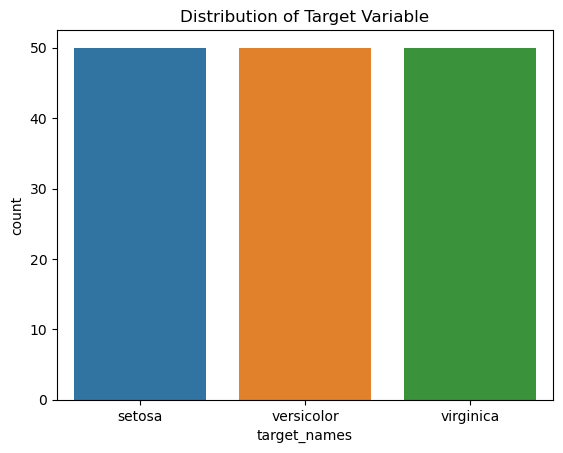

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['target_names'])
plt.title('Distribution of Target Variable')
plt.show()

## Perform any necessary data preprocessing steps:

In [29]:
# Encode target variable to binary
df['is_virginica'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

# Drop unnecessary columns
df.drop(['target', 'target_names'], axis=1, inplace=True)

# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('is_virginica', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['is_virginica']

## Split Iris dataset into training and testing sets (e.g., 80% training, 20% testing):

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Implement logistic regression:

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = (1/m) * (-y.T.dot(np.log(h + epsilon)) - (1-y).T.dot(np.log(1-h + epsilon)))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = [0] * iterations
    
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        theta = theta - (learning_rate/m) * X.T.dot(h - y)
        cost_history[i] = compute_cost(theta, X, y)
    
    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train.shape[1])
iterations = 1000
learning_rate = 0.01

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

## Visualize the cost function:

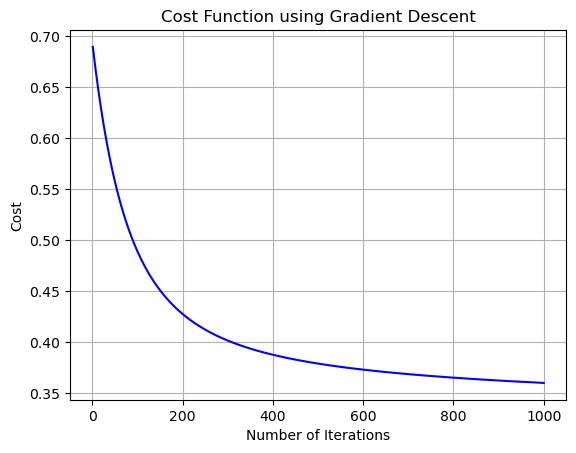

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost Function using Gradient Descent")
plt.show()

## Evaluate the logistic regression model's performance on the testing set:

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def predict(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

# Predictions on the test set
y_pred = predict(X_test, theta)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.7
Precision: 0.5263157894736842
Recall: 1.0
F1-Score: 0.6896551724137931


## Visualize the ROC curve and calculate the AUC-ROC score:

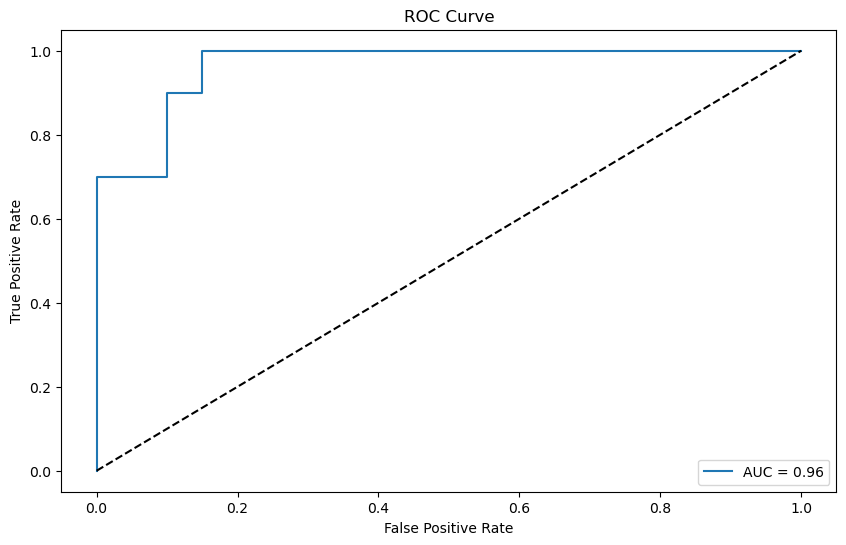

In [44]:
# Get predicted probabilities
y_pred_prob = sigmoid(X_test.dot(theta))

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()